In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = 'Folkhalsomyndigheten_Covid19.xlsx'

In [11]:
xl = pd.ExcelFile('data/'+file_name)
# xl.sheet_names
dpd = xl.parse('Antal avlidna per dag', skipfooter=1)

In [12]:
dpd['kumulativ'] = dpd['Antal_avlidna'].cumsum()

In [13]:
dpd['rullande'] = dpd['Antal_avlidna'].rolling(7, center=True).mean()

In [14]:
dpd.tail()

,Datum_avliden,Antal_avlidna,kumulativ,rullande
40,2020-04-20,70,2023,60.428571
41,2020-04-21,46,2069,52.571429
42,2020-04-22,43,2112,NaN
43,2020-04-23,41,2153,NaN
44,2020-04-24,19,2172,NaN


In [15]:
ndpd = pd.melt(dpd, id_vars='Datum_avliden', var_name='typ', value_name='antal')

In [16]:
ndpd['Datum_avliden'] = ndpd['Datum_avliden'].dt.date

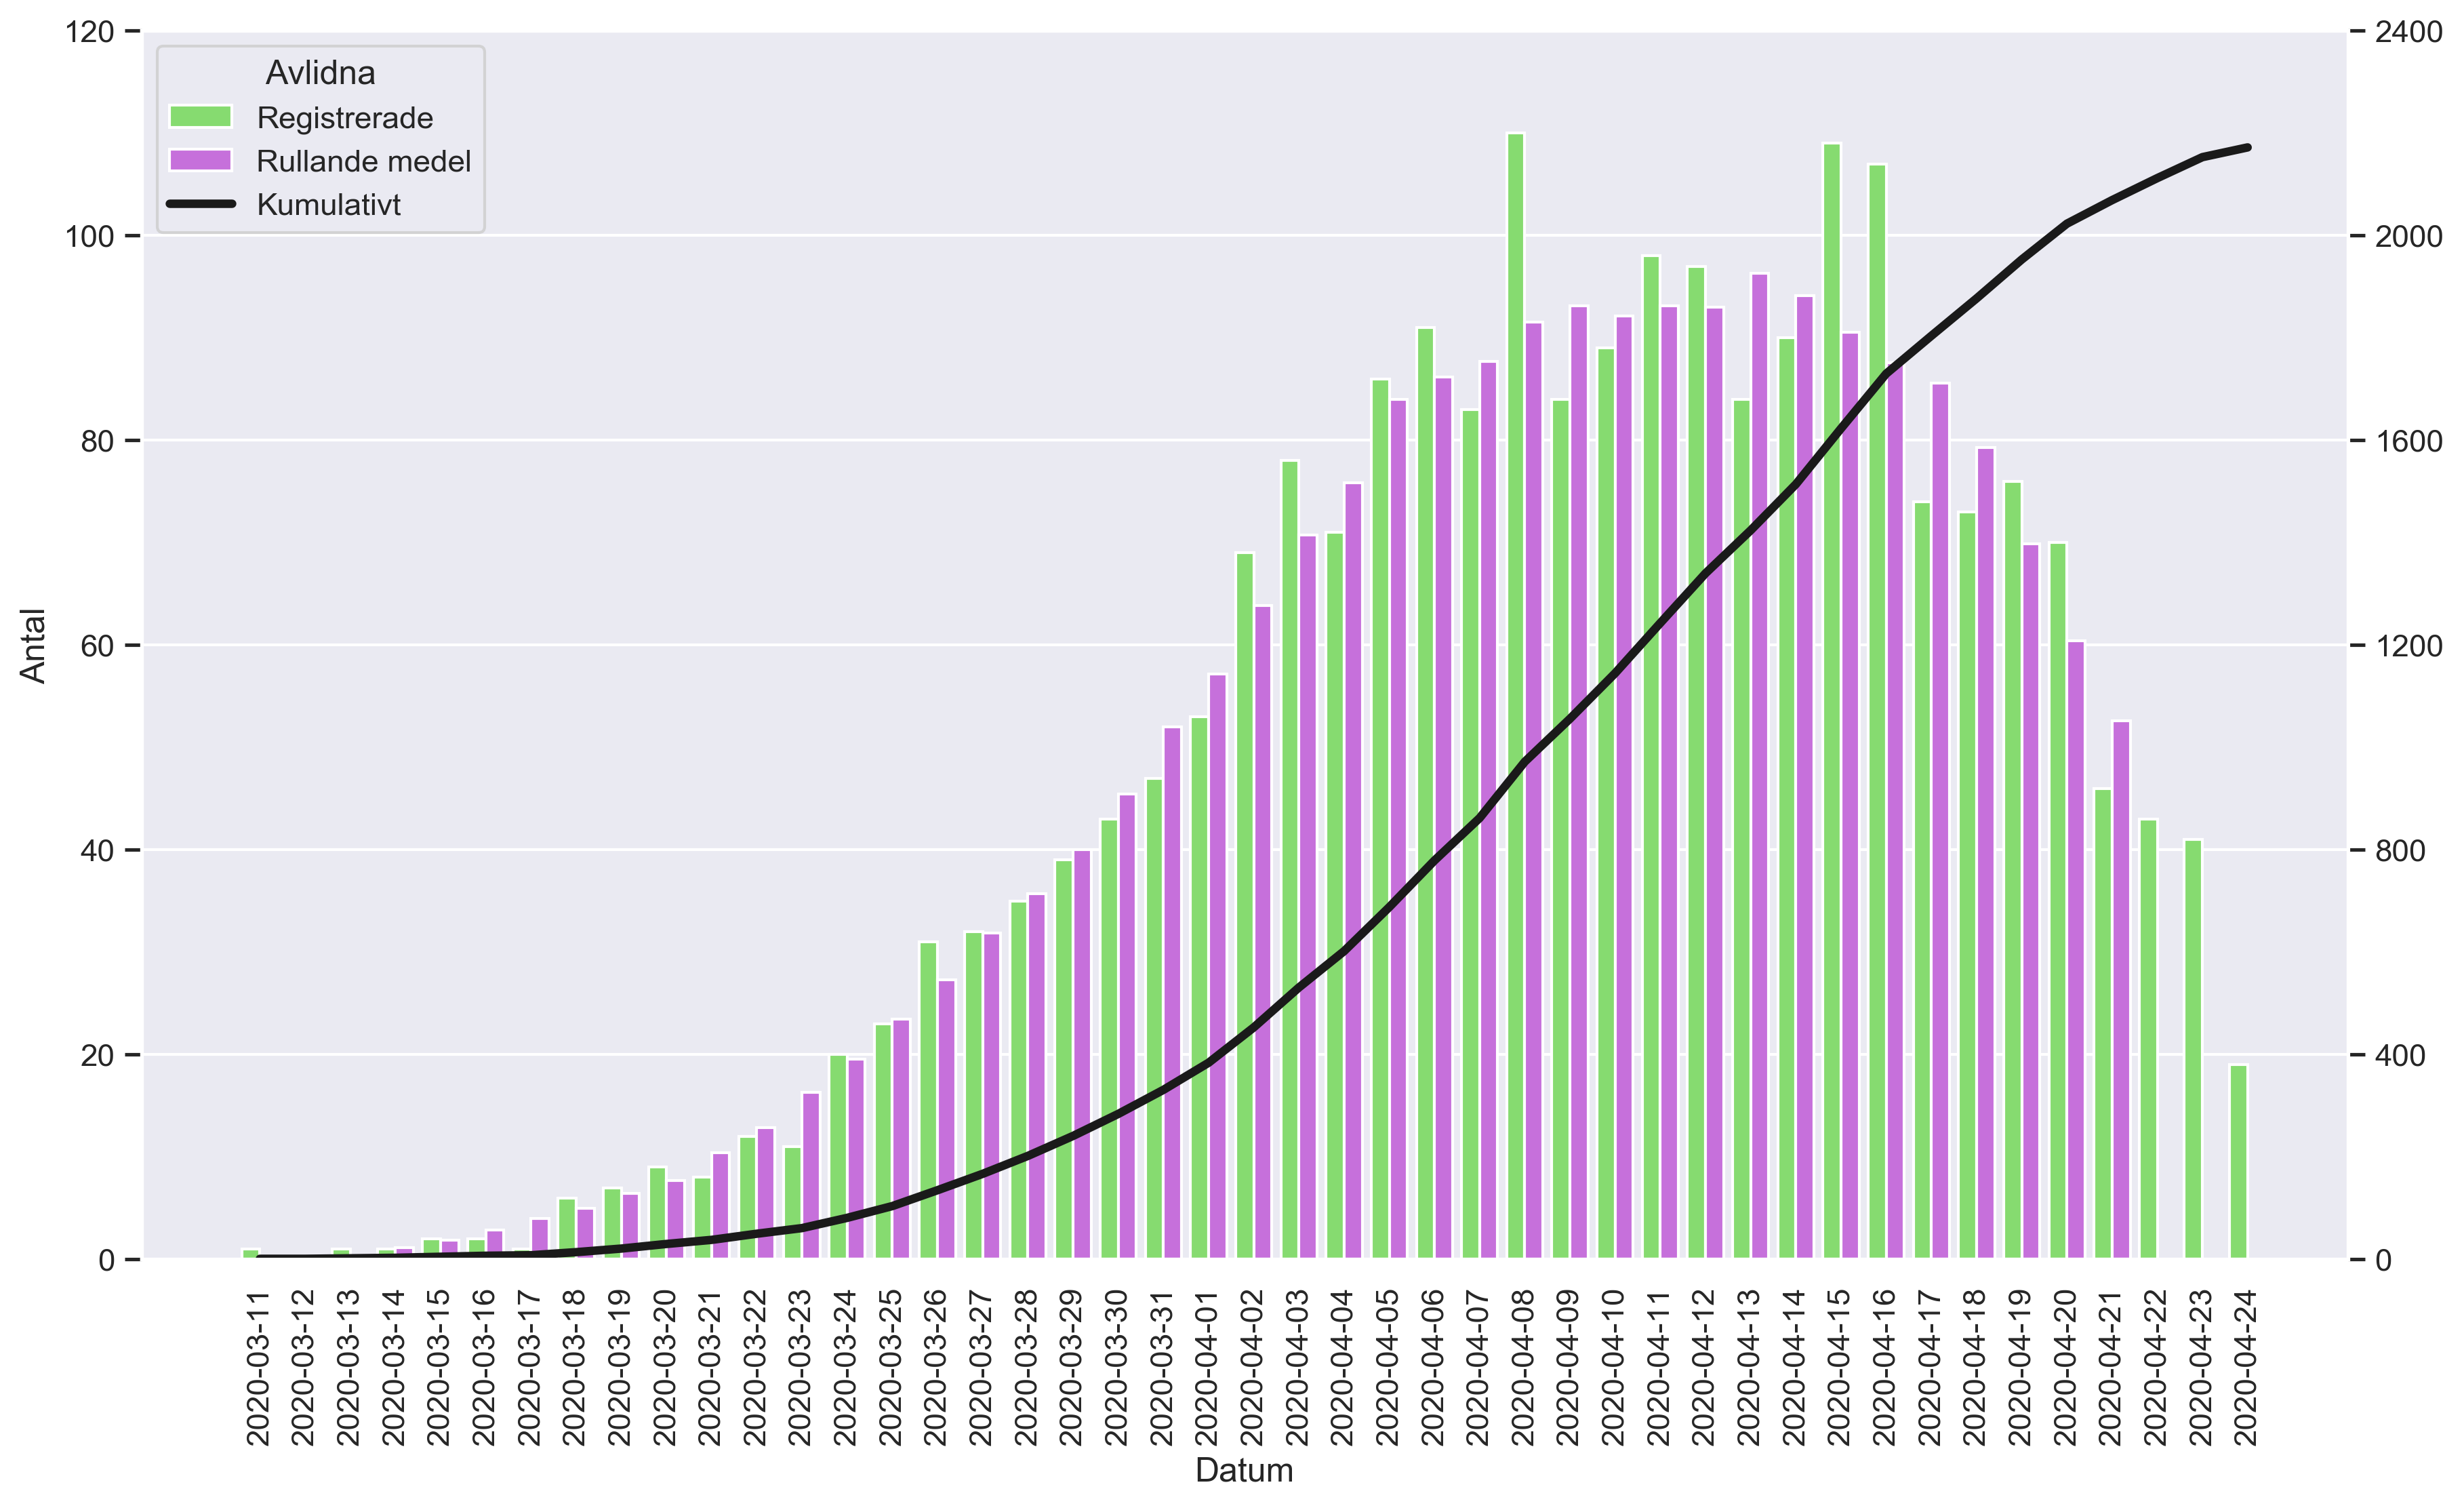

In [17]:
sns.set()
pal = sns.hls_palette(2, h=.3, l=.65, s=.8)
sns.set_palette(pal)

f, ax = plt.subplots(figsize=(14,8), dpi=300)
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.grid(False)

x1 = ndpd['Datum_avliden']
x2 = np.arange(len(x1)/3)

g = sns.barplot(data=ndpd.query("typ in ['Antal_avlidna', 'rullande']"), x=x1, y='antal', hue='typ', ax=ax)
sns.lineplot(data=ndpd.query("typ == 'kumulativ'"), x=x2, y='antal', ax=ax2, color='k', label='Kumulativa', linewidth=3)

g.legend_.remove()
h,l = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(loc='upper left', handles=h+h2, title='Avlidna', labels=['Registrerade', 'Rullande medel', 'Kumulativt'])

ax.set_xlabel('Datum')
ax.set_ylabel('Antal')
ax2.set_ylabel(None)

ax.set_ylim(0,120)
ax2.set_ylim(0,2400)
ax2.set_yticks([0,400,800,1200,1600,2000,2400])

plt.savefig('graphs/deaths.png', bbox_inches='tight')